In [1]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/preop_vital'
vital_list = os.listdir(vital_path)
SRATE = 100
LEN_INPUT = 120
non_list, error_list = [], []


#LEN = SRATE*LEN_INPUT # len per nrs
non_ecg, short_ecg, long_ecg = 0, 0, 0
cnt = 0
for f_vital in vital_list:
    cnt += 1
    cachepath = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_preop_all/" + f_vital.split('_',1)[1]
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing peak ' + f_vital[3:])
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/ECG_II'], interval = 1/SRATE).flatten()
        vals = pd.DataFrame(vals).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        if len(np.unique(vals)) <= 1:
            print('  no data')
            non_list.append(f_vital)
            continue

            
        print('\ndetecting peak...', end='')
        
        try:
            r_peak_list = arr.detect_qrs((pd.DataFrame(vals).fillna(method='ffill').fillna(method='bfill').values.flatten()),SRATE)

        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(cachepath, 'wb'))
            print('successfully saved ECG peaks')     

(1/4116) size of F4_190718_122631.vital : 59820
detecting peak...successfully saved ECG peaks
(2/4116) size of R2_201017_152717.vital : 59611
detecting peak...successfully saved ECG peaks
(3/4116) size of R7_200325_140654.vital : 59701
detecting peak...successfully saved ECG peaks
(4/4116) size of R6_200311_074332.vital : 59925
detecting peak...successfully saved ECG peaks
(5/4116) size of D1_190717_122932.vital : 59840
detecting peak...successfully saved ECG peaks
(6/4116) size of D4_190723_120847.vital : 59640
detecting peak...successfully saved ECG peaks
(7/4116) size of R6_200521_075516.vital : 59661
detecting peak...successfully saved ECG peaks
(8/4116) size of E1_200120_074737.vital : 59820
detecting peak...successfully saved ECG peaks
(9/4116) size of R2_200318_140336.vital : 59861
detecting peak...successfully saved ECG peaks
(10/4116) size of E4_200629_142321.vital : 0  no data
(11/4116) size of D4_200717_132621.vital : 59920
detecting peak...successfully saved ECG peaks
(12/4

detecting peak...successfully saved ECG peaks
(90/4116) size of C3_201016_142607.vital : 59640
detecting peak...successfully saved ECG peaks
(91/4116) size of F1_190903_141413.vital : 59520
detecting peak...successfully saved ECG peaks
(92/4116) size of D2_200526_205224.vital : 59980
detecting peak...successfully saved ECG peaks
(93/4116) size of A2_190723_142945.vital : 59690
detecting peak...successfully saved ECG peaks
(94/4116) size of A1_190830_144554.vital : 59560
detecting peak...successfully saved ECG peaks
(95/4116) size of A5_191023_112031.vital : 59500
detecting peak...successfully saved ECG peaks
(96/4116) size of R3_200114_101554.vital : 59960
detecting peak...successfully saved ECG peaks
(97/4116) size of R6_200730_134521.vital : 59671
detecting peak...successfully saved ECG peaks
(98/4116) size of R3_200312_074723.vital : 59662
detecting peak...successfully saved ECG peaks
(99/4116) size of E1_200803_110846.vital : 59560
detecting peak...successfully saved ECG peaks
(100

detecting peak...successfully saved ECG peaks
(176/4116) size of A2_191017_101910.vital : 59499
detecting peak...successfully saved ECG peaks
(177/4116) size of F4_190816_143938.vital : 59880
detecting peak...successfully saved ECG peaks
(178/4116) size of A5_190718_075007.vital : 59908
detecting peak...successfully saved ECG peaks
(179/4116) size of D2_200821_160508.vital : 59700
detecting peak...successfully saved ECG peaks
(180/4116) size of C3_191024_122252.vital : 59779
detecting peak...successfully saved ECG peaks
(181/4116) size of A5_190710_120007.vital : 59900
detecting peak...successfully saved ECG peaks
(182/4116) size of R2_200923_075030.vital : 59521
detecting peak...successfully saved ECG peaks
(183/4116) size of E4_190509_074438.vital : 59657
detecting peak...successfully saved ECG peaks
(184/4116) size of D3_200218_124709.vital : 59940
detecting peak...successfully saved ECG peaks
(185/4116) size of D4_200630_075614.vital : 59720
detecting peak...successfully saved ECG 

detecting peak...successfully saved ECG peaks
(262/4116) size of D4_190917_075001.vital : 59620
detecting peak...successfully saved ECG peaks
(263/4116) size of B3_200916_160158.vital : 1  no data
(264/4116) size of R2_201014_211205.vital : 59831
detecting peak...successfully saved ECG peaks
(265/4116) size of R4_200207_154712.vital : 59662
detecting peak...successfully saved ECG peaks
(266/4116) size of R6_200302_170121.vital : 59921
detecting peak...successfully saved ECG peaks
(267/4116) size of R4_200304_074618.vital : 31300
detecting peak...successfully saved ECG peaks
(268/4116) size of R9_200820_092607.vital : 59641
detecting peak...successfully saved ECG peaks
(269/4116) size of R5_200507_232406.vital : 59763
detecting peak...successfully saved ECG peaks
(270/4116) size of D4_190820_181817.vital : 59900
detecting peak...successfully saved ECG peaks
(271/4116) size of E3_190819_144936.vital : 59801
detecting peak...successfully saved ECG peaks
(272/4116) size of E5_200608_074235

detecting peak...successfully saved ECG peaks
(350/4116) size of D4_200102_084316.vital : 59680
detecting peak...successfully saved ECG peaks
(351/4116) size of F1_191018_075531.vital : 59603
detecting peak...successfully saved ECG peaks
(352/4116) size of E3_201008_152838.vital : 59801
detecting peak...successfully saved ECG peaks
(353/4116) size of B3_200917_092135.vital : 1  no data
(354/4116) size of R9_201031_084856.vital : 59581
detecting peak...successfully saved ECG peaks
(355/4116) size of R2_200129_123425.vital : 59900
detecting peak...successfully saved ECG peaks
(356/4116) size of D2_200219_075622.vital : 59940
detecting peak...successfully saved ECG peaks
(357/4116) size of E2_200220_171326.vital : 59840
detecting peak...successfully saved ECG peaks
(358/4116) size of D1_200623_095842.vital : 59780
detecting peak...successfully saved ECG peaks
(359/4116) size of A1_190904_101554.vital : 59680
detecting peak...successfully saved ECG peaks
(360/4116) size of C5_200319_144532

detecting peak...successfully saved ECG peaks
(437/4116) size of R6_200228_150042.vital : 59841
detecting peak...successfully saved ECG peaks
(438/4116) size of E6_190719_124554.vital : 59940
detecting peak...successfully saved ECG peaks
(439/4116) size of D2_200210_103803.vital : 59780
detecting peak...successfully saved ECG peaks
(440/4116) size of R3_200625_101347.vital : 59881
detecting peak...successfully saved ECG peaks
(441/4116) size of R1_200602_081641.vital : 59661
detecting peak...successfully saved ECG peaks
(442/4116) size of R8_200812_102125.vital : 59961
detecting peak...successfully saved ECG peaks
(443/4116) size of D1_200811_210431.vital : 1  no data
(444/4116) size of R8_200304_102240.vital : 59900
detecting peak...successfully saved ECG peaks
(445/4116) size of R5_200204_074523.vital : 59660
detecting peak...successfully saved ECG peaks
(446/4116) size of C4_200106_122536.vital : 59600
detecting peak...successfully saved ECG peaks
(447/4116) size of D4_190821_193902

detecting peak...successfully saved ECG peaks
(524/4116) size of R5_200603_101428.vital : 59646
detecting peak...successfully saved ECG peaks
(525/4116) size of D3_190918_125906.vital : 59831
detecting peak...successfully saved ECG peaks
(526/4116) size of R4_200318_162650.vital : 59521
detecting peak...successfully saved ECG peaks
(527/4116) size of C3_190611_105055.vital : 59612
detecting peak...successfully saved ECG peaks
(528/4116) size of R10_200917_075032.vital : 59581
detecting peak...successfully saved ECG peaks
(529/4116) size of D4_190502_124635.vital : 59560
detecting peak...successfully saved ECG peaks
(530/4116) size of C4_201008_074816.vital : 59473
detecting peak...successfully saved ECG peaks
(531/4116) size of R8_200304_164408.vital : 59860
detecting peak...successfully saved ECG peaks
(532/4116) size of D1_200317_112632.vital : 59520
detecting peak...successfully saved ECG peaks
(533/4116) size of R8_200915_202605.vital : 59941
detecting peak...successfully saved ECG

detecting peak...successfully saved ECG peaks
(612/4116) size of R5_200716_075626.vital : 59841
detecting peak...successfully saved ECG peaks
(613/4116) size of C5_190507_073910.vital : 59900
detecting peak...successfully saved ECG peaks
(614/4116) size of R3_200514_084853.vital : 59861
detecting peak...successfully saved ECG peaks
(615/4116) size of R10_200113_123258.vital : 59783
detecting peak...successfully saved ECG peaks
(616/4116) size of E3_200515_125743.vital : 59540
detecting peak...successfully saved ECG peaks
(617/4116) size of R8_200527_101316.vital : 59881
detecting peak...successfully saved ECG peaks
(618/4116) size of R6_201019_181551.vital : 59781
detecting peak...successfully saved ECG peaks
(619/4116) size of C4_200511_185747.vital : 59871
detecting peak...successfully saved ECG peaks
(620/4116) size of R5_200923_225928.vital : 59641
detecting peak...successfully saved ECG peaks
(621/4116) size of D4_200317_142833.vital : 59880
detecting peak...successfully saved ECG

detecting peak...successfully saved ECG peaks
(699/4116) size of R3_200204_123011.vital : 59980
detecting peak...successfully saved ECG peaks
(700/4116) size of D3_200107_075014.vital : 59820
detecting peak...successfully saved ECG peaks
(701/4116) size of F4_190517_092610.vital : 59900
detecting peak...successfully saved ECG peaks
(702/4116) size of R5_200219_094131.vital : 59900
detecting peak...successfully saved ECG peaks
(703/4116) size of D1_200729_074729.vital : 59902
detecting peak...successfully saved ECG peaks
(704/4116) size of C3_200207_094545.vital : 59620
detecting peak...successfully saved ECG peaks
(705/4116) size of R5_200611_174215.vital : 59961
detecting peak...successfully saved ECG peaks
(706/4116) size of D1_190709_144806.vital : 59760
detecting peak...successfully saved ECG peaks
(707/4116) size of E1_200220_081140.vital : 59760
detecting peak...successfully saved ECG peaks
(708/4116) size of R6_200924_100405.vital : 59461
detecting peak...successfully saved ECG 

detecting peak...successfully saved ECG peaks
(786/4116) size of R1_200611_111742.vital : 59441
detecting peak...successfully saved ECG peaks
(787/4116) size of D4_190611_203631.vital : 59600
detecting peak...successfully saved ECG peaks
(788/4116) size of R10_200313_092701.vital : 59880
detecting peak...successfully saved ECG peaks
(789/4116) size of R1_200716_180749.vital : 59781
detecting peak...successfully saved ECG peaks
(790/4116) size of C5_200116_222848.vital : 59985
detecting peak...successfully saved ECG peaks
(791/4116) size of B3_200916_102834.vital : 1  no data
(792/4116) size of B5_200915_145310.vital : 1  no data
(793/4116) size of D3_200707_080035.vital : 59700
detecting peak...successfully saved ECG peaks
(794/4116) size of R2_200325_075224.vital : 59661
detecting peak...successfully saved ECG peaks
(795/4116) size of A3_190816_124835.vital : 59741
detecting peak...successfully saved ECG peaks
(796/4116) size of E4_201028_161038.vital : 59821
detecting peak...successf

detecting peak...successfully saved ECG peaks
(873/4116) size of R6_200211_075923.vital : 59620
detecting peak...successfully saved ECG peaks
(874/4116) size of E4_190530_105412.vital : 59731
detecting peak...successfully saved ECG peaks
(875/4116) size of C5_200914_142334.vital : 59520
detecting peak...successfully saved ECG peaks
(876/4116) size of C3_190709_094903.vital : 59880
detecting peak...successfully saved ECG peaks
(877/4116) size of R5_200814_001844.vital : 59841
detecting peak...successfully saved ECG peaks
(878/4116) size of C4_190703_073742.vital : 59800
detecting peak...successfully saved ECG peaks
(879/4116) size of C5_200331_074748.vital : 59860
detecting peak...successfully saved ECG peaks
(880/4116) size of E5_200602_133042.vital : 59900
detecting peak...successfully saved ECG peaks
(881/4116) size of R8_200609_091133.vital : 59901
detecting peak...successfully saved ECG peaks
(882/4116) size of R9_200828_075922.vital : 59701
detecting peak...successfully saved ECG 

detecting peak...successfully saved ECG peaks
(959/4116) size of R10_200224_152038.vital : 59630
detecting peak...successfully saved ECG peaks
(960/4116) size of A6_190830_123627.vital : 59980
detecting peak...successfully saved ECG peaks
(961/4116) size of R10_200610_074029.vital : 59861
detecting peak...successfully saved ECG peaks
(962/4116) size of R7_200512_080357.vital : 59761
detecting peak...successfully saved ECG peaks
(963/4116) size of C5_200221_133256.vital : 59940
detecting peak...successfully saved ECG peaks
(964/4116) size of A1_190418_164714.vital : 59560
detecting peak...successfully saved ECG peaks
(965/4116) size of R1_200701_074957.vital : 59581
detecting peak...successfully saved ECG peaks
(966/4116) size of D4_190723_075402.vital : 59900
detecting peak...successfully saved ECG peaks
(967/4116) size of D2_200726_075232.vital : 59680
detecting peak...successfully saved ECG peaks
(968/4116) size of C1_190718_181043.vital : 59740
detecting peak...successfully saved EC

detecting peak...successfully saved ECG peaks
(1046/4116) size of R6_200327_075253.vital : 54390
detecting peak...successfully saved ECG peaks
(1047/4116) size of A2_190516_073957.vital : 59500
detecting peak...successfully saved ECG peaks
(1048/4116) size of D1_190918_073725.vital : 59800
detecting peak...successfully saved ECG peaks
(1049/4116) size of C3_200514_114818.vital : 59576
detecting peak...successfully saved ECG peaks
(1050/4116) size of R10_200923_075138.vital : 59621
detecting peak...successfully saved ECG peaks
(1051/4116) size of C3_200319_113944.vital : 59840
detecting peak...successfully saved ECG peaks
(1052/4116) size of E3_200611_183240.vital : 59640
detecting peak...successfully saved ECG peaks
(1053/4116) size of D1_190717_141617.vital : 59480
detecting peak...successfully saved ECG peaks
(1054/4116) size of R8_200916_183607.vital : 59821
detecting peak...successfully saved ECG peaks
(1055/4116) size of D4_190904_144948.vital : 59916
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(1131/4116) size of B5_201027_193925.vital : 1  no data
(1132/4116) size of D2_200211_093320.vital : 59560
detecting peak...successfully saved ECG peaks
(1133/4116) size of R2_200915_125759.vital : 59521
detecting peak...successfully saved ECG peaks
(1134/4116) size of F3_190816_140723.vital : 59540
detecting peak...successfully saved ECG peaks
(1135/4116) size of C4_200706_074322.vital : 59511
detecting peak...successfully saved ECG peaks
(1136/4116) size of R5_200722_143127.vital : 59701
detecting peak...successfully saved ECG peaks
(1137/4116) size of D1_200611_221409.vital : 59560
detecting peak...successfully saved ECG peaks
(1138/4116) size of C3_200604_142102.vital : 59660
detecting peak...successfully saved ECG peaks
(1139/4116) size of C5_200526_105714.vital : 59600
detecting peak...successfully saved ECG peaks
(1140/4116) size of R9_200331_074938.vital : 59781
detecting peak...successfully saved ECG peaks
(1141/4116) size of A2_19

detecting peak...successfully saved ECG peaks
(1217/4116) size of E4_200609_142233.vital : 59940
detecting peak...successfully saved ECG peaks
(1218/4116) size of F3_190509_075007.vital : 59960
detecting peak...successfully saved ECG peaks
(1219/4116) size of R6_200911_151720.vital : 59661
detecting peak...successfully saved ECG peaks
(1220/4116) size of R2_200909_074803.vital : 59499
detecting peak...successfully saved ECG peaks
(1221/4116) size of E3_190425_092222.vital : 59500
detecting peak...successfully saved ECG peaks
(1222/4116) size of C3_200109_090305.vital : 59762
detecting peak...successfully saved ECG peaks
(1223/4116) size of E1_190430_180240.vital : 59900
detecting peak...successfully saved ECG peaks
(1224/4116) size of R5_200529_134950.vital : 59521
detecting peak...successfully saved ECG peaks
(1225/4116) size of E1_200108_074705.vital : 59860
detecting peak...successfully saved ECG peaks
(1226/4116) size of E3_200102_103210.vital : 59583
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(1303/4116) size of R7_200806_110738.vital : 59608
detecting peak...successfully saved ECG peaks
(1304/4116) size of R1_200929_154957.vital : 59731
detecting peak...successfully saved ECG peaks
(1305/4116) size of D3_190906_135146.vital : 59880
detecting peak...successfully saved ECG peaks
(1306/4116) size of C5_200215_083619.vital : 59980
detecting peak...successfully saved ECG peaks
(1307/4116) size of R6_200807_095530.vital : 59681
detecting peak...successfully saved ECG peaks
(1308/4116) size of R5_201015_214453.vital : 59501
detecting peak...successfully saved ECG peaks
(1309/4116) size of E1_200703_153132.vital : 59840
detecting peak...successfully saved ECG peaks
(1310/4116) size of E4_200630_113051.vital : 59998
detecting peak...successfully saved ECG peaks
(1311/4116) size of C3_200717_074245.vital : 59660
detecting peak...successfully saved ECG peaks
(1312/4116) size of C3_200529_092625.vital : 59640
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(1389/4116) size of C3_200213_124635.vital : 59860
detecting peak...successfully saved ECG peaks
(1390/4116) size of R5_200708_112855.vital : 59523
detecting peak...successfully saved ECG peaks
(1391/4116) size of C4_200910_074537.vital : 59420
detecting peak...successfully saved ECG peaks
(1392/4116) size of C3_200924_130052.vital : 59660
detecting peak...successfully saved ECG peaks
(1393/4116) size of F3_200113_110531.vital : 59880
detecting peak...successfully saved ECG peaks
(1394/4116) size of C5_200205_074358.vital : 59861
detecting peak...successfully saved ECG peaks
(1395/4116) size of D1_200320_203657.vital : 59500
detecting peak...successfully saved ECG peaks
(1396/4116) size of R4_200622_153124.vital : 59661
detecting peak...successfully saved ECG peaks
(1397/4116) size of R3_200728_112149.vital : 59941
detecting peak...successfully saved ECG peaks
(1398/4116) size of A2_190509_120526.vital : 59580
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(1475/4116) size of A1_190515_074500.vital : 59600
detecting peak...successfully saved ECG peaks
(1476/4116) size of D1_190528_144343.vital : 59980
detecting peak...successfully saved ECG peaks
(1477/4116) size of D5_200706_181857.vital : 59480
detecting peak...successfully saved ECG peaks
(1478/4116) size of E3_190830_145429.vital : 59800
detecting peak...successfully saved ECG peaks
(1479/4116) size of R4_200225_121015.vital : 59900
detecting peak...successfully saved ECG peaks
(1480/4116) size of R4_200625_123433.vital : 59621
detecting peak...successfully saved ECG peaks
(1481/4116) size of F3_191017_110914.vital : 59734
detecting peak...successfully saved ECG peaks
(1482/4116) size of E3_190829_144122.vital : 59500
detecting peak...successfully saved ECG peaks
(1483/4116) size of E1_200102_205717.vital : 59680
detecting peak...successfully saved ECG peaks
(1484/4116) size of D5_190531_074956.vital : 59920
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(1561/4116) size of R6_200320_120420.vital : 59884
detecting peak...successfully saved ECG peaks
(1562/4116) size of D3_200813_124117.vital : 59860
detecting peak...successfully saved ECG peaks
(1563/4116) size of C5_200324_110116.vital : 59680
detecting peak...successfully saved ECG peaks
(1564/4116) size of R1_200715_074213.vital : 59861
detecting peak...successfully saved ECG peaks
(1565/4116) size of R3_200529_133417.vital : 59741
detecting peak...successfully saved ECG peaks
(1566/4116) size of A5_190821_092626.vital : 59520
detecting peak...successfully saved ECG peaks
(1567/4116) size of C2_200320_074039.vital : 59884
detecting peak...successfully saved ECG peaks
(1568/4116) size of C4_201007_110231.vital : 59545
detecting peak...successfully saved ECG peaks
(1569/4116) size of D4_200131_135445.vital : 59900
detecting peak...successfully saved ECG peaks
(1570/4116) size of C2_200207_140715.vital : 59856
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(1646/4116) size of E4_200511_145322.vital : 59680
detecting peak...successfully saved ECG peaks
(1647/4116) size of D1_200610_092941.vital : 59704
detecting peak...successfully saved ECG peaks
(1648/4116) size of E1_190911_074337.vital : 59540
detecting peak...successfully saved ECG peaks
(1649/4116) size of R3_201014_075449.vital : 59981
detecting peak...successfully saved ECG peaks
(1650/4116) size of R6_200508_115040.vital : 59861
detecting peak...successfully saved ECG peaks
(1651/4116) size of D1_200219_120903.vital : 59820
detecting peak...successfully saved ECG peaks
(1652/4116) size of D3_190711_153824.vital : 59740
detecting peak...successfully saved ECG peaks
(1653/4116) size of A5_190829_074640.vital : 59860
detecting peak...successfully saved ECG peaks
(1654/4116) size of D5_190709_112622.vital : 59960
detecting peak...successfully saved ECG peaks
(1655/4116) size of R7_200714_080520.vital : 59602
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(1732/4116) size of R9_200916_075405.vital : 59681
detecting peak...successfully saved ECG peaks
(1733/4116) size of R2_200813_221552.vital : 59601
detecting peak...successfully saved ECG peaks
(1734/4116) size of C4_201030_185047.vital : 59877
detecting peak...successfully saved ECG peaks
(1735/4116) size of R9_200929_075053.vital : 59701
detecting peak...successfully saved ECG peaks
(1736/4116) size of C3_200915_075803.vital : 59680
detecting peak...successfully saved ECG peaks
(1737/4116) size of D5_200109_143038.vital : 59940
detecting peak...successfully saved ECG peaks
(1738/4116) size of R3_200707_085043.vital : 59841
detecting peak...successfully saved ECG peaks
(1739/4116) size of R9_200318_075308.vital : 59961
detecting peak...successfully saved ECG peaks
(1740/4116) size of F3_190716_075350.vital : 59440
detecting peak...successfully saved ECG peaks
(1741/4116) size of R8_200512_080742.vital : 59994
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(1818/4116) size of A5_190424_101203.vital : 59740
detecting peak...successfully saved ECG peaks
(1819/4116) size of D1_200114_160335.vital : 59540
detecting peak...successfully saved ECG peaks
(1820/4116) size of C3_200604_125113.vital : 59760
detecting peak...successfully saved ECG peaks
(1821/4116) size of E6_200211_145705.vital : 59811
detecting peak...successfully saved ECG peaks
(1822/4116) size of B1_201008_233945.vital : 1  no data
(1823/4116) size of E2_200121_145000.vital : 59560
detecting peak...successfully saved ECG peaks
(1824/4116) size of R7_200130_115023.vital : 59517
detecting peak...successfully saved ECG peaks
(1825/4116) size of F1_190515_074501.vital : 59780
detecting peak...successfully saved ECG peaks
(1826/4116) size of D1_200820_230623.vital : 1  no data
(1827/4116) size of C4_200219_074141.vital : 59880
detecting peak...successfully saved ECG peaks
(1828/4116) size of E6_200529_120236.vital : 59561
detecting peak.

detecting peak...successfully saved ECG peaks
(1905/4116) size of R6_201030_102953.vital : 59841
detecting peak...successfully saved ECG peaks
(1906/4116) size of D1_200715_085659.vital : 59887
detecting peak...successfully saved ECG peaks
(1907/4116) size of E5_200508_075008.vital : 59680
detecting peak...successfully saved ECG peaks
(1908/4116) size of R10_201002_191046.vital : 59761
detecting peak...successfully saved ECG peaks
(1909/4116) size of E6_190911_135519.vital : 59434
detecting peak...successfully saved ECG peaks
(1910/4116) size of R6_200917_134835.vital : 59701
detecting peak...successfully saved ECG peaks
(1911/4116) size of F4_190716_130033.vital : 59860
detecting peak...successfully saved ECG peaks
(1912/4116) size of E4_200218_145023.vital : 59420
detecting peak...successfully saved ECG peaks
(1913/4116) size of D3_190514_144647.vital : 59640
detecting peak...successfully saved ECG peaks
(1914/4116) size of R3_200615_075350.vital : 59881
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(1991/4116) size of R2_200625_133727.vital : 59901
detecting peak...successfully saved ECG peaks
(1992/4116) size of R2_200313_123556.vital : 59841
detecting peak...successfully saved ECG peaks
(1993/4116) size of C5_201006_074841.vital : 59640
detecting peak...successfully saved ECG peaks
(1994/4116) size of C3_200611_114245.vital : 59660
detecting peak...successfully saved ECG peaks
(1995/4116) size of A4_190816_151557.vital : 59805
detecting peak...successfully saved ECG peaks
(1996/4116) size of R10_200917_124147.vital : 59690
detecting peak...successfully saved ECG peaks
(1997/4116) size of R1_201006_111032.vital : 59861
detecting peak...successfully saved ECG peaks
(1998/4116) size of A5_190509_141701.vital : 59647
detecting peak...successfully saved ECG peaks
(1999/4116) size of R10_201006_074935.vital : 59851
detecting peak...successfully saved ECG peaks
(2000/4116) size of R1_200318_074502.vital : 59641
detecting peak...successfull

detecting peak...successfully saved ECG peaks
(2078/4116) size of A3_190527_132212.vital : 59780
detecting peak...successfully saved ECG peaks
(2079/4116) size of F1_190422_080113.vital : 59840
detecting peak...successfully saved ECG peaks
(2080/4116) size of D3_190425_075528.vital : 1  no data
(2081/4116) size of R6_200904_114133.vital : 59601
detecting peak...successfully saved ECG peaks
(2082/4116) size of R8_201021_104231.vital : 59941
detecting peak...successfully saved ECG peaks
(2083/4116) size of R9_200824_124535.vital : 59801
detecting peak...successfully saved ECG peaks
(2084/4116) size of C2_200609_130713.vital : 59511
detecting peak...successfully saved ECG peaks
(2085/4116) size of A6_191017_112224.vital : 59540
detecting peak...successfully saved ECG peaks
(2086/4116) size of E5_200708_142946.vital : 59900
detecting peak...successfully saved ECG peaks
(2087/4116) size of E4_190712_164044.vital : 59540
detecting peak...successfully saved ECG peaks
(2088/4116) size of C2_19

detecting peak...successfully saved ECG peaks
(2164/4116) size of E4_190705_075336.vital : 59740
detecting peak...successfully saved ECG peaks
(2165/4116) size of C5_201020_182638.vital : 59640
detecting peak...successfully saved ECG peaks
(2166/4116) size of E2_190820_105654.vital : 59740
detecting peak...successfully saved ECG peaks
(2167/4116) size of R6_200319_075805.vital : 59961
detecting peak...successfully saved ECG peaks
(2168/4116) size of R8_200306_075738.vital : 59885
detecting peak...successfully saved ECG peaks
(2169/4116) size of E6_190517_074410.vital : 59776
detecting peak...successfully saved ECG peaks
(2170/4116) size of D3_200319_131244.vital : 59520
detecting peak...successfully saved ECG peaks
(2171/4116) size of R9_200610_091014.vital : 59821
detecting peak...successfully saved ECG peaks
(2172/4116) size of A1_190712_073748.vital : 59901
detecting peak...successfully saved ECG peaks
(2173/4116) size of R3_200327_162409.vital : 59995
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(2336/4116) size of D1_200811_103915.vital : 1  no data
(2337/4116) size of C5_200609_074144.vital : 59731
detecting peak...successfully saved ECG peaks
(2338/4116) size of C4_200507_075159.vital : 59560
detecting peak...successfully saved ECG peaks
(2339/4116) size of E2_200618_205135.vital : 59880
detecting peak...successfully saved ECG peaks
(2340/4116) size of D5_200715_142807.vital : 59520
detecting peak...successfully saved ECG peaks
(2341/4116) size of R4_200717_085217.vital : 59681
detecting peak...successfully saved ECG peaks
(2342/4116) size of E2_200715_142759.vital : 59840
detecting peak...successfully saved ECG peaks
(2343/4116) size of C3_200529_142942.vital : 59780
detecting peak...successfully saved ECG peaks
(2344/4116) size of E4_190715_085202.vital : 59880
detecting peak...successfully saved ECG peaks
(2345/4116) size of A5_190909_120542.vital : 59800
detecting peak...successfully saved ECG peaks
(2346/4116) size of R8_20

detecting peak...successfully saved ECG peaks
(2423/4116) size of C2_200130_114050.vital : 59780
detecting peak...successfully saved ECG peaks
(2424/4116) size of F4_190527_130940.vital : 59840
detecting peak...successfully saved ECG peaks
(2425/4116) size of R1_200610_191624.vital : 59481
detecting peak...successfully saved ECG peaks
(2426/4116) size of F3_190823_173838.vital : 59520
detecting peak...successfully saved ECG peaks
(2427/4116) size of C3_200312_132531.vital : 59860
detecting peak...successfully saved ECG peaks
(2428/4116) size of R6_200603_120942.vital : 59516
detecting peak...successfully saved ECG peaks
(2429/4116) size of A5_190412_074900.vital : 59500
detecting peak...successfully saved ECG peaks
(2430/4116) size of C5_200322_092628.vital : 59860
detecting peak...successfully saved ECG peaks
(2431/4116) size of D2_200805_095851.vital : 59534
detecting peak...successfully saved ECG peaks
(2432/4116) size of R10_201027_075608.vital : 59791
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(2595/4116) size of E4_200720_104613.vital : 59791
detecting peak...successfully saved ECG peaks
(2596/4116) size of C3_200324_095146.vital : 59573
detecting peak...successfully saved ECG peaks
(2597/4116) size of E1_200528_075510.vital : 59880
detecting peak...successfully saved ECG peaks
(2598/4116) size of R4_200921_112044.vital : 59701
detecting peak...successfully saved ECG peaks
(2599/4116) size of D5_190828_113045.vital : 59861
detecting peak...successfully saved ECG peaks
(2600/4116) size of C5_200214_110122.vital : 59580
detecting peak...successfully saved ECG peaks
(2601/4116) size of D3_201019_115429.vital : 59661
detecting peak...successfully saved ECG peaks
(2602/4116) size of D2_200818_074136.vital : 59720
detecting peak...successfully saved ECG peaks
(2603/4116) size of R5_200508_080646.vital : 59536
detecting peak...successfully saved ECG peaks
(2604/4116) size of F2_190829_074758.vital : 59700
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(2680/4116) size of F4_190531_113249.vital : 59920
detecting peak...successfully saved ECG peaks
(2681/4116) size of D1_200228_102312.vital : 59640
detecting peak...successfully saved ECG peaks
(2682/4116) size of R6_200702_075942.vital : 59961
detecting peak...successfully saved ECG peaks
(2683/4116) size of C3_200110_121216.vital : 59800
detecting peak...successfully saved ECG peaks
(2684/4116) size of B4_200914_152526.vital : 1  no data
(2685/4116) size of R4_200320_074733.vital : 59513
detecting peak...successfully saved ECG peaks
(2686/4116) size of A2_200107_075619.vital : 59780
detecting peak...successfully saved ECG peaks
(2687/4116) size of A2_190429_074020.vital : 59520
detecting peak...successfully saved ECG peaks
(2688/4116) size of R6_200715_134308.vital : 59881
detecting peak...successfully saved ECG peaks
(2689/4116) size of C4_201016_075418.vital : 59453
detecting peak...successfully saved ECG peaks
(2690/4116) size of D2_20

detecting peak...successfully saved ECG peaks
(2766/4116) size of D2_190903_075314.vital : 59560
detecting peak...successfully saved ECG peaks
(2767/4116) size of D2_200817_111038.vital : 59851
detecting peak...successfully saved ECG peaks
(2768/4116) size of C3_200716_074908.vital : 59752
detecting peak...successfully saved ECG peaks
(2769/4116) size of R9_200909_074614.vital : 59541
detecting peak...successfully saved ECG peaks
(2770/4116) size of R3_200530_193017.vital : 59694
detecting peak...successfully saved ECG peaks
(2771/4116) size of A2_190611_111931.vital : 59740
detecting peak...successfully saved ECG peaks
(2772/4116) size of R1_200122_151200.vital : 59751
detecting peak...successfully saved ECG peaks
(2773/4116) size of A5_190717_075445.vital : 59820
detecting peak...successfully saved ECG peaks
(2774/4116) size of B4_200918_084408.vital : 1  no data
(2775/4116) size of B4_200916_122648.vital : 1  no data
(2776/4116) size of R6_200617_094952.vital : 59601
detecting peak.

detecting peak...successfully saved ECG peaks
(2852/4116) size of B2_201008_115945.vital : 1  no data
(2853/4116) size of E3_200206_074204.vital : 59860
detecting peak...successfully saved ECG peaks
(2854/4116) size of C4_190904_074358.vital : 59520
detecting peak...successfully saved ECG peaks
(2855/4116) size of E5_200715_140822.vital : 59850
detecting peak...successfully saved ECG peaks
(2856/4116) size of R10_200527_131501.vital : 59481
detecting peak...successfully saved ECG peaks
(2857/4116) size of D5_190507_135904.vital : 59840
detecting peak...successfully saved ECG peaks
(2858/4116) size of D3_190716_091535.vital : 59659
detecting peak...successfully saved ECG peaks
(2859/4116) size of A2_200107_175222.vital : 59860
detecting peak...successfully saved ECG peaks
(2860/4116) size of E4_200302_075054.vital : 59540
detecting peak...successfully saved ECG peaks
(2861/4116) size of D3_191024_193051.vital : 59800
detecting peak...successfully saved ECG peaks
(2862/4116) size of R3_2

detecting peak...successfully saved ECG peaks
(2939/4116) size of A3_191021_152313.vital : 59740
detecting peak...successfully saved ECG peaks
(2940/4116) size of R1_200911_142227.vital : 59761
detecting peak...successfully saved ECG peaks
(2941/4116) size of R1_200318_095813.vital : 59421
detecting peak...successfully saved ECG peaks
(2942/4116) size of C4_200922_075059.vital : 59600
detecting peak...successfully saved ECG peaks
(2943/4116) size of A5_190515_075512.vital : 59705
detecting peak...successfully saved ECG peaks
(2944/4116) size of E4_190821_073705.vital : 59651
detecting peak...successfully saved ECG peaks
(2945/4116) size of E4_190821_144924.vital : 59880
detecting peak...successfully saved ECG peaks
(2946/4116) size of R2_200728_113229.vital : 59523
detecting peak...successfully saved ECG peaks
(2947/4116) size of D2_200630_204148.vital : 59940
detecting peak...successfully saved ECG peaks
(2948/4116) size of F1_190821_141724.vital : 59954
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(3026/4116) size of E3_200110_123031.vital : 59520
detecting peak...successfully saved ECG peaks
(3027/4116) size of C3_200730_150103.vital : 59931
detecting peak...successfully saved ECG peaks
(3028/4116) size of D5_190516_075649.vital : 59840
detecting peak...successfully saved ECG peaks
(3029/4116) size of R6_200120_114437.vital : 59970
detecting peak...successfully saved ECG peaks
(3030/4116) size of E2_190704_101854.vital : 59720
detecting peak...successfully saved ECG peaks
(3031/4116) size of D1_200811_122024.vital : 1  no data
(3032/4116) size of A3_190823_075601.vital : 59880
detecting peak...successfully saved ECG peaks
(3033/4116) size of D5_190909_151045.vital : 59820
detecting peak...successfully saved ECG peaks
(3034/4116) size of R10_200302_125105.vital : 59711
detecting peak...successfully saved ECG peaks
(3035/4116) size of R4_200219_102312.vital : 59540
detecting peak...successfully saved ECG peaks
(3036/4116) size of R1_2

detecting peak...successfully saved ECG peaks
(3201/4116) size of R7_200228_080320.vital : 59633
detecting peak...successfully saved ECG peaks
(3202/4116) size of R9_200811_111534.vital : 59781
detecting peak...successfully saved ECG peaks
(3203/4116) size of R2_200213_075912.vital : 59740
detecting peak...successfully saved ECG peaks
(3204/4116) size of F4_190531_074225.vital : 59500
detecting peak...successfully saved ECG peaks
(3205/4116) size of R3_200731_142952.vital : 59901
detecting peak...successfully saved ECG peaks
(3206/4116) size of D4_190709_150029.vital : 59780
detecting peak...successfully saved ECG peaks
(3207/4116) size of R2_200714_075149.vital : 59661
detecting peak...successfully saved ECG peaks
(3208/4116) size of E2_200617_075157.vital : 59640
detecting peak...successfully saved ECG peaks
(3209/4116) size of E2_200313_075243.vital : 59820
detecting peak...successfully saved ECG peaks
(3210/4116) size of R2_200812_140539.vital : 59621
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(3286/4116) size of E2_191113_142327.vital : 59640
detecting peak...successfully saved ECG peaks
(3287/4116) size of R2_201006_121809.vital : 59461
detecting peak...successfully saved ECG peaks
(3288/4116) size of B5_200909_113052.vital : 1  no data
(3289/4116) size of R3_200221_125105.vital : 59460
detecting peak...successfully saved ECG peaks
(3290/4116) size of C3_200313_122208.vital : 59680
detecting peak...successfully saved ECG peaks
(3291/4116) size of R8_201026_113039.vital : 59981
detecting peak...successfully saved ECG peaks
(3292/4116) size of D1_200129_122004.vital : 59892
detecting peak...successfully saved ECG peaks
(3293/4116) size of R6_200915_080407.vital : 59661
detecting peak...successfully saved ECG peaks
(3294/4116) size of R9_200623_075037.vital : 59521
detecting peak...successfully saved ECG peaks
(3295/4116) size of R4_200207_120202.vital : 59720
detecting peak...successfully saved ECG peaks
(3296/4116) size of E4_20

detecting peak...successfully saved ECG peaks
(3371/4116) size of C3_190816_122708.vital : 59921
detecting peak...successfully saved ECG peaks
(3372/4116) size of A3_190909_103410.vital : 59860
detecting peak...successfully saved ECG peaks
(3373/4116) size of C3_200306_132104.vital : 59740
detecting peak...successfully saved ECG peaks
(3374/4116) size of D2_190510_075958.vital : 59820
detecting peak...successfully saved ECG peaks
(3375/4116) size of D1_200210_140441.vital : 59560
detecting peak...successfully saved ECG peaks
(3376/4116) size of R6_201022_075804.vital : 59521
detecting peak...successfully saved ECG peaks
(3377/4116) size of R5_200611_075516.vital : 59841
detecting peak...successfully saved ECG peaks
(3378/4116) size of E1_200629_075048.vital : 59800
detecting peak...successfully saved ECG peaks
(3379/4116) size of R4_200714_104301.vital : 59661
detecting peak...successfully saved ECG peaks
(3380/4116) size of E1_200529_123357.vital : 59860
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(3457/4116) size of C5_201007_075737.vital : 59904
detecting peak...successfully saved ECG peaks
(3458/4116) size of R4_200219_174044.vital : 59680
detecting peak...successfully saved ECG peaks
(3459/4116) size of E4_190611_140118.vital : 59789
detecting peak...successfully saved ECG peaks
(3460/4116) size of R8_201023_131950.vital : 59921
detecting peak...successfully saved ECG peaks
(3461/4116) size of B4_200925_080326.vital : 1  no data
(3462/4116) size of F2_190816_134910.vital : 59760
detecting peak...successfully saved ECG peaks
(3463/4116) size of D5_190712_075133.vital : 59540
detecting peak...successfully saved ECG peaks
(3464/4116) size of R1_200710_090029.vital : 59861
detecting peak...successfully saved ECG peaks
(3465/4116) size of R8_200917_130128.vital : 59911
detecting peak...successfully saved ECG peaks
(3466/4116) size of C4_200304_075646.vital : 59582
detecting peak...successfully saved ECG peaks
(3467/4116) size of C4_20

detecting peak...successfully saved ECG peaks
(3543/4116) size of C2_200706_074013.vital : 59520
detecting peak...successfully saved ECG peaks
(3544/4116) size of D2_201008_082102.vital : 59821
detecting peak...successfully saved ECG peaks
(3545/4116) size of D1_190528_103216.vital : 59880
detecting peak...successfully saved ECG peaks
(3546/4116) size of R4_200122_155235.vital : 59600
detecting peak...successfully saved ECG peaks
(3547/4116) size of E4_190902_202749.vital : 59540
detecting peak...successfully saved ECG peaks
(3548/4116) size of E1_201007_124055.vital : 59461
detecting peak...successfully saved ECG peaks
(3549/4116) size of A1_190503_111925.vital : 59800
detecting peak...successfully saved ECG peaks
(3550/4116) size of A5_190906_101502.vital : 59927
detecting peak...successfully saved ECG peaks
(3551/4116) size of R6_200602_121942.vital : 59566
detecting peak...successfully saved ECG peaks
(3552/4116) size of D3_201007_230009.vital : 59661
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(3629/4116) size of C4_190409_124347.vital : 59800
detecting peak...successfully saved ECG peaks
(3630/4116) size of A1_200102_144830.vital : 59900
detecting peak...successfully saved ECG peaks
(3631/4116) size of E4_200312_172636.vital : 59680
detecting peak...successfully saved ECG peaks
(3632/4116) size of R10_200211_074849.vital : 59460
detecting peak...successfully saved ECG peaks
(3633/4116) size of C3_200228_095118.vital : 59702
detecting peak...successfully saved ECG peaks
(3634/4116) size of E3_190820_155744.vital : 59880
detecting peak...successfully saved ECG peaks
(3635/4116) size of A5_190703_184035.vital : 59860
detecting peak...successfully saved ECG peaks
(3636/4116) size of A1_190906_090232.vital : 59500
detecting peak...successfully saved ECG peaks
(3637/4116) size of E4_190816_141322.vital : 59960
detecting peak...successfully saved ECG peaks
(3638/4116) size of R4_200819_151302.vital : 59681
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(3715/4116) size of E4_190819_201204.vital : 59620
detecting peak...successfully saved ECG peaks
(3716/4116) size of C4_190906_170753.vital : 59600
detecting peak...successfully saved ECG peaks
(3717/4116) size of R8_200625_125312.vital : 59941
detecting peak...successfully saved ECG peaks
(3718/4116) size of D5_190717_120014.vital : 59880
detecting peak...successfully saved ECG peaks
(3719/4116) size of E1_200929_151732.vital : 59811
detecting peak...successfully saved ECG peaks
(3720/4116) size of R3_200122_093528.vital : 59951
detecting peak...successfully saved ECG peaks
(3721/4116) size of B4_201014_121146.vital : 1  no data
(3722/4116) size of D1_200616_101051.vital : 59505
detecting peak...successfully saved ECG peaks
(3723/4116) size of D1_201006_153718.vital : 59574
detecting peak...successfully saved ECG peaks
(3724/4116) size of E3_200909_074848.vital : 59611
detecting peak...successfully saved ECG peaks
(3725/4116) size of B1_20

detecting peak...successfully saved ECG peaks
(3802/4116) size of R5_200603_090438.vital : 59621
detecting peak...successfully saved ECG peaks
(3803/4116) size of A1_190523_105609.vital : 59780
detecting peak...successfully saved ECG peaks
(3804/4116) size of F4_190905_184314.vital : 59660
detecting peak...successfully saved ECG peaks
(3805/4116) size of A1_190524_075502.vital : 59503
detecting peak...successfully saved ECG peaks
(3806/4116) size of E1_200515_104721.vital : 59580
detecting peak...successfully saved ECG peaks
(3807/4116) size of E6_200313_111553.vital : 59823
detecting peak...successfully saved ECG peaks
(3808/4116) size of R8_200114_095520.vital : 59880
detecting peak...successfully saved ECG peaks
(3809/4116) size of R6_201027_074507.vital : 59801
detecting peak...successfully saved ECG peaks
(3810/4116) size of D1_200114_174008.vital : 59440
detecting peak...successfully saved ECG peaks
(3811/4116) size of E1_200619_075744.vital : 59800
detecting peak...successfully 

detecting peak...successfully saved ECG peaks
(3974/4116) size of A6_190718_205207.vital : 59860
detecting peak...successfully saved ECG peaks
(3975/4116) size of R3_200130_074900.vital : 59780
detecting peak...successfully saved ECG peaks
(3976/4116) size of D3_190827_125700.vital : 59501
detecting peak...successfully saved ECG peaks
(3977/4116) size of F2_200108_074212.vital : 59380
detecting peak...successfully saved ECG peaks
(3978/4116) size of E4_190918_143219.vital : 59780
detecting peak...successfully saved ECG peaks
(3979/4116) size of D2_200312_172901.vital : 59620
detecting peak...successfully saved ECG peaks
(3980/4116) size of E1_200924_075538.vital : 59651
detecting peak...successfully saved ECG peaks
(3981/4116) size of F3_190828_095334.vital : 59640
detecting peak...successfully saved ECG peaks
(3982/4116) size of R2_200506_161348.vital : 59811
detecting peak...successfully saved ECG peaks
(3983/4116) size of R4_200804_134759.vital : 59761
detecting peak...successfully 

# PPG 100hz lowess filter

## Pacu

In [34]:
import statsmodels.api as sm


def smooth(y):
    #return savitzky_golay(y, window_size=2001, order=3)
    return lowess(y)

# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal
#sys.path.append('DL_model')


### input 설정
SRATE = 100 # 250Hz
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 60 # vital length for each NRS
OVERLAP = 2
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수




input_path = '../DL_model/dataset/preprocess4/PPG_100Hz/'
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])

if os.path.exists(input_path+'x_train_pacu.npz'):
    print('loading train...', flush=True, end='')
    x_train_pacu = np.load(input_path+'x_train_pacu.npz', allow_pickle=True)['arr_0']
    y_train_pacu = np.load(input_path+'y_train_pacu.npz')['arr_0']
    x_test_pacu = np.load(input_path+'x_test_pacu.npz', allow_pickle=True)['arr_0']
    y_test_pacu = np.load(input_path+'y_test_pacu.npz')['arr_0']
    print('done', flush=True)

else:
    false_row_list_preop = []
    
    vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_2min/'
    ecg_path = '../../cranberry2/Preprocessing/vital_data/ECG_250Hz_pacu_2min/ECG,'
    df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess3/input3/df_preprocess_pacu_agender','rb'))
    df_demograph = pd.read_csv('../DL_model/caseids_age_gender.csv')
    

    ### test set에 해당하는 file_path
    caseid_test = pickle.load(open('../DL_model/caseid_test_new', 'rb'))
    caseid_train = pickle.load(open('../DL_model/caseid_train_new', 'rb'))
    caseid_val = pickle.load(open('../DL_model/caseid_val_new', 'rb'))
    
    non_lis = []
    x_train_pacu, y_train_pacu = [], []
    x_test_pacu, y_test_pacu = [], []
    x_val_pacu, y_val_pacu = [], []
    age_train_pacu, gender_train_pacu = [], []
    age_test_pacu, gender_test_pacu = [], []
    age_val_pacu, gender_val_pacu = [], []

    cnt = 0
    for _, row in df_preprocess_pacu.iterrows():
        cnt += 1
        if cnt >3600:
            break
        print('loading data {}/{} ...'.format(cnt, len(df_preprocess_pacu)), end='')
        row_demo = df_demograph[df_demograph['caseids']==row['caseids']].iloc[0]
            

        # vital data - PPG (resampling 100 Hz to 250 Hz)
        df_vital = pickle.load(open(vital_path+row['file_path'], 'rb')).reset_index()
        pleth_samp = df_vital[['Pleth']].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()[:12000]
        ppg_per_NRS = np.full(12000, np.nan)
        ppg_per_NRS[0:len(pleth_samp)] = pleth_samp
        


   

        save_path = '../../cranberry2/Preprocessing/cache/lowess_filtered_PPG_100Hz/pacu_'+row['caseids']
        # 한 NRS에 대해 23개의 input 확인
        for i in range(30,51):
            # input이 전처리 통과한 경우
            if row[str(i+1)]:
                start_idx = i*OVERLAP*SRATE # 500i
                end_idx = (i*OVERLAP+LEN_INPUT)*SRATE # 500i + 1000
                
                # input의 normalization
                ppg_inp = np.copy(ppg_per_NRS[start_idx:end_idx])
                if np.sum(np.isnan(ppg_inp))!=0:
                    ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    
                pleth_inp = ppg_inp - smooth(ppg_inp)
                pleth_inp = pleth_inp - np.nanmean(pleth_inp)
                
                
                pickle.dump(pleth_inp, open(save_path+'_{}'.format(i), 'wb'))
                # 해당 caseid가 test set에 속하는 경우
                if row['caseids'] in caseid_test:
                    x_test_pacu.append(pleth_inp)
                    y_test_pacu.append(int(float(row['NRS'])))

                # 해당 caseid가 train set에 해당하는 경우
                elif row['caseids'] in caseid_val:                
                    x_val_pacu.append(pleth_inp)
                    y_val_pacu.append(int(float(row['NRS'])))
                    
                elif row['caseids'] in caseid_train:                 
                    x_train_pacu.append(pleth_inp)
                    y_train_pacu.append(int(float(row['NRS'])))
                    
                else:
                    non_lis.append(row['caseids'])
                    
        print('completed')

    
    x_train_pacu = np.array(x_train_pacu, np.float32)
    x_test_pacu = np.array(x_test_pacu, np.float32)
    y_train_pacu = np.array(y_train_pacu, int)
    y_test_pacu = np.array(y_test_pacu, int)
    x_val_pacu = np.array(x_val_pacu, np.float32)
    y_val_pacu = np.array(y_val_pacu, int)
    

   
        
    # 저장하기
    print('saving...', end='', flush=True)
    np.savez_compressed(input_path+'x_train_pacu1.npz', x_train_pacu)
    np.savez_compressed(input_path+'x_test_pacu1.npz', x_test_pacu)
    np.savez_compressed(input_path+'x_val_pacu1.npz', x_val_pacu)
    np.savez_compressed(input_path+'y_train_pacu1.npz', y_train_pacu)
    np.savez_compressed(input_path+'y_test_pacu1.npz', y_test_pacu)
    np.savez_compressed(input_path+'y_val_pacu1.npz', y_val_pacu)
    print('done', flush=True)

    
    
    
print('size of training set(pacu):', len(x_train_pacu))
print('size of validation set(pacu):', len(x_val_pacu))
print('size of test set(pacu):', len(x_test_pacu))

loading data 1/7253 ...completed
loading data 2/7253 ...completed
loading data 3/7253 ...completed
loading data 4/7253 ...completed
loading data 5/7253 ...completed
loading data 6/7253 ...completed
loading data 7/7253 ...completed
loading data 8/7253 ...completed
loading data 9/7253 ...completed
loading data 10/7253 ...completed
loading data 11/7253 ...completed
loading data 12/7253 ...completed
loading data 13/7253 ...completed
loading data 14/7253 ...completed
loading data 15/7253 ...completed
loading data 16/7253 ...completed
loading data 17/7253 ...completed
loading data 18/7253 ...completed
loading data 19/7253 ...completed
loading data 20/7253 ...completed
loading data 21/7253 ...completed
loading data 22/7253 ...completed
loading data 23/7253 ...completed
loading data 24/7253 ...completed
loading data 25/7253 ...completed
loading data 26/7253 ...completed
loading data 27/7253 ...completed
loading data 28/7253 ...completed
loading data 29/7253 ...completed
loading data 30/7253 ..

loading data 238/7253 ...completed
loading data 239/7253 ...completed
loading data 240/7253 ...completed
loading data 241/7253 ...completed
loading data 242/7253 ...completed
loading data 243/7253 ...completed
loading data 244/7253 ...completed
loading data 245/7253 ...completed
loading data 246/7253 ...completed
loading data 247/7253 ...completed
loading data 248/7253 ...completed
loading data 249/7253 ...completed
loading data 250/7253 ...completed
loading data 251/7253 ...completed
loading data 252/7253 ...completed
loading data 253/7253 ...completed
loading data 254/7253 ...completed
loading data 255/7253 ...completed
loading data 256/7253 ...completed
loading data 257/7253 ...completed
loading data 258/7253 ...completed
loading data 259/7253 ...completed
loading data 260/7253 ...completed
loading data 261/7253 ...completed
loading data 262/7253 ...completed
loading data 263/7253 ...completed
loading data 264/7253 ...completed
loading data 265/7253 ...completed
loading data 266/725

loading data 472/7253 ...completed
loading data 473/7253 ...completed
loading data 474/7253 ...completed
loading data 475/7253 ...completed
loading data 476/7253 ...completed
loading data 477/7253 ...completed
loading data 478/7253 ...completed
loading data 479/7253 ...completed
loading data 480/7253 ...completed
loading data 481/7253 ...completed
loading data 482/7253 ...completed
loading data 483/7253 ...completed
loading data 484/7253 ...completed
loading data 485/7253 ...completed
loading data 486/7253 ...completed
loading data 487/7253 ...completed
loading data 488/7253 ...completed
loading data 489/7253 ...completed
loading data 490/7253 ...completed
loading data 491/7253 ...completed
loading data 492/7253 ...completed
loading data 493/7253 ...completed
loading data 494/7253 ...completed
loading data 495/7253 ...completed
loading data 496/7253 ...completed
loading data 497/7253 ...completed
loading data 498/7253 ...completed
loading data 499/7253 ...completed
loading data 500/725

loading data 706/7253 ...completed
loading data 707/7253 ...completed
loading data 708/7253 ...completed
loading data 709/7253 ...completed
loading data 710/7253 ...completed
loading data 711/7253 ...completed
loading data 712/7253 ...completed
loading data 713/7253 ...completed
loading data 714/7253 ...completed
loading data 715/7253 ...completed
loading data 716/7253 ...completed
loading data 717/7253 ...completed
loading data 718/7253 ...completed
loading data 719/7253 ...completed
loading data 720/7253 ...completed
loading data 721/7253 ...completed
loading data 722/7253 ...completed
loading data 723/7253 ...completed
loading data 724/7253 ...completed
loading data 725/7253 ...completed
loading data 726/7253 ...completed
loading data 727/7253 ...completed
loading data 728/7253 ...completed
loading data 729/7253 ...completed
loading data 730/7253 ...completed
loading data 731/7253 ...completed
loading data 732/7253 ...completed
loading data 733/7253 ...completed
loading data 734/725

loading data 940/7253 ...completed
loading data 941/7253 ...completed
loading data 942/7253 ...completed
loading data 943/7253 ...completed
loading data 944/7253 ...completed
loading data 945/7253 ...completed
loading data 946/7253 ...completed
loading data 947/7253 ...completed
loading data 948/7253 ...completed
loading data 949/7253 ...completed
loading data 950/7253 ...completed
loading data 951/7253 ...completed
loading data 952/7253 ...completed
loading data 953/7253 ...completed
loading data 954/7253 ...completed
loading data 955/7253 ...completed
loading data 956/7253 ...completed
loading data 957/7253 ...completed
loading data 958/7253 ...completed
loading data 959/7253 ...completed
loading data 960/7253 ...completed
loading data 961/7253 ...completed
loading data 962/7253 ...completed
loading data 963/7253 ...completed
loading data 964/7253 ...completed
loading data 965/7253 ...completed
loading data 966/7253 ...completed
loading data 967/7253 ...completed
loading data 968/725

loading data 1171/7253 ...completed
loading data 1172/7253 ...completed
loading data 1173/7253 ...completed
loading data 1174/7253 ...completed
loading data 1175/7253 ...completed
loading data 1176/7253 ...completed
loading data 1177/7253 ...completed
loading data 1178/7253 ...completed
loading data 1179/7253 ...completed
loading data 1180/7253 ...completed
loading data 1181/7253 ...completed
loading data 1182/7253 ...completed
loading data 1183/7253 ...completed
loading data 1184/7253 ...completed
loading data 1185/7253 ...completed
loading data 1186/7253 ...completed
loading data 1187/7253 ...completed
loading data 1188/7253 ...completed
loading data 1189/7253 ...completed
loading data 1190/7253 ...completed
loading data 1191/7253 ...completed
loading data 1192/7253 ...completed
loading data 1193/7253 ...completed
loading data 1194/7253 ...completed
loading data 1195/7253 ...completed
loading data 1196/7253 ...completed
loading data 1197/7253 ...completed
loading data 1198/7253 ...co

loading data 1398/7253 ...completed
loading data 1399/7253 ...completed
loading data 1400/7253 ...completed
loading data 1401/7253 ...completed
loading data 1402/7253 ...completed
loading data 1403/7253 ...completed
loading data 1404/7253 ...completed
loading data 1405/7253 ...completed
loading data 1406/7253 ...completed
loading data 1407/7253 ...completed
loading data 1408/7253 ...completed
loading data 1409/7253 ...completed
loading data 1410/7253 ...completed
loading data 1411/7253 ...completed
loading data 1412/7253 ...completed
loading data 1413/7253 ...completed
loading data 1414/7253 ...completed
loading data 1415/7253 ...completed
loading data 1416/7253 ...completed
loading data 1417/7253 ...completed
loading data 1418/7253 ...completed
loading data 1419/7253 ...completed
loading data 1420/7253 ...completed
loading data 1421/7253 ...completed
loading data 1422/7253 ...completed
loading data 1423/7253 ...completed
loading data 1424/7253 ...completed
loading data 1425/7253 ...co

loading data 1626/7253 ...completed
loading data 1627/7253 ...completed
loading data 1628/7253 ...completed
loading data 1629/7253 ...completed
loading data 1630/7253 ...completed
loading data 1631/7253 ...completed
loading data 1632/7253 ...completed
loading data 1633/7253 ...completed
loading data 1634/7253 ...completed
loading data 1635/7253 ...completed
loading data 1636/7253 ...completed
loading data 1637/7253 ...completed
loading data 1638/7253 ...completed
loading data 1639/7253 ...completed
loading data 1640/7253 ...completed
loading data 1641/7253 ...completed
loading data 1642/7253 ...completed
loading data 1643/7253 ...completed
loading data 1644/7253 ...completed
loading data 1645/7253 ...completed
loading data 1646/7253 ...completed
loading data 1647/7253 ...completed
loading data 1648/7253 ...completed
loading data 1649/7253 ...completed
loading data 1650/7253 ...completed
loading data 1651/7253 ...completed
loading data 1652/7253 ...completed
loading data 1653/7253 ...co

loading data 1855/7253 ...completed
loading data 1856/7253 ...completed
loading data 1857/7253 ...completed
loading data 1858/7253 ...completed
loading data 1859/7253 ...completed
loading data 1860/7253 ...completed
loading data 1861/7253 ...completed
loading data 1862/7253 ...completed
loading data 1863/7253 ...completed
loading data 1864/7253 ...completed
loading data 1865/7253 ...completed
loading data 1866/7253 ...completed
loading data 1867/7253 ...completed
loading data 1868/7253 ...completed
loading data 1869/7253 ...completed
loading data 1870/7253 ...completed
loading data 1871/7253 ...completed
loading data 1872/7253 ...completed
loading data 1873/7253 ...completed
loading data 1874/7253 ...completed
loading data 1875/7253 ...completed
loading data 1876/7253 ...completed
loading data 1877/7253 ...completed
loading data 1878/7253 ...completed
loading data 1879/7253 ...completed
loading data 1880/7253 ...completed
loading data 1881/7253 ...completed
loading data 1882/7253 ...co

loading data 2082/7253 ...completed
loading data 2083/7253 ...completed
loading data 2084/7253 ...completed
loading data 2085/7253 ...completed
loading data 2086/7253 ...completed
loading data 2087/7253 ...completed
loading data 2088/7253 ...completed
loading data 2089/7253 ...completed
loading data 2090/7253 ...completed
loading data 2091/7253 ...completed
loading data 2092/7253 ...completed
loading data 2093/7253 ...completed
loading data 2094/7253 ...completed
loading data 2095/7253 ...completed
loading data 2096/7253 ...completed
loading data 2097/7253 ...completed
loading data 2098/7253 ...completed
loading data 2099/7253 ...completed
loading data 2100/7253 ...completed
loading data 2101/7253 ...completed
loading data 2102/7253 ...completed
loading data 2103/7253 ...completed
loading data 2104/7253 ...completed
loading data 2105/7253 ...completed
loading data 2106/7253 ...completed
loading data 2107/7253 ...completed
loading data 2108/7253 ...completed
loading data 2109/7253 ...co

loading data 2309/7253 ...completed
loading data 2310/7253 ...completed
loading data 2311/7253 ...completed
loading data 2312/7253 ...completed
loading data 2313/7253 ...completed
loading data 2314/7253 ...completed
loading data 2315/7253 ...completed
loading data 2316/7253 ...completed
loading data 2317/7253 ...completed
loading data 2318/7253 ...completed
loading data 2319/7253 ...completed
loading data 2320/7253 ...completed
loading data 2321/7253 ...completed
loading data 2322/7253 ...completed
loading data 2323/7253 ...completed
loading data 2324/7253 ...completed
loading data 2325/7253 ...completed
loading data 2326/7253 ...completed
loading data 2327/7253 ...completed
loading data 2328/7253 ...completed
loading data 2329/7253 ...completed
loading data 2330/7253 ...completed
loading data 2331/7253 ...completed
loading data 2332/7253 ...completed
loading data 2333/7253 ...completed
loading data 2334/7253 ...completed
loading data 2335/7253 ...completed
loading data 2336/7253 ...co

loading data 2537/7253 ...completed
loading data 2538/7253 ...completed
loading data 2539/7253 ...completed
loading data 2540/7253 ...completed
loading data 2541/7253 ...completed
loading data 2542/7253 ...completed
loading data 2543/7253 ...completed
loading data 2544/7253 ...completed
loading data 2545/7253 ...completed
loading data 2546/7253 ...completed
loading data 2547/7253 ...completed
loading data 2548/7253 ...completed
loading data 2549/7253 ...completed
loading data 2550/7253 ...completed
loading data 2551/7253 ...completed
loading data 2552/7253 ...completed
loading data 2553/7253 ...completed
loading data 2554/7253 ...completed
loading data 2555/7253 ...completed
loading data 2556/7253 ...completed
loading data 2557/7253 ...completed
loading data 2558/7253 ...completed
loading data 2559/7253 ...completed
loading data 2560/7253 ...completed
loading data 2561/7253 ...completed
loading data 2562/7253 ...completed
loading data 2563/7253 ...completed
loading data 2564/7253 ...co

loading data 2764/7253 ...completed
loading data 2765/7253 ...completed
loading data 2766/7253 ...completed
loading data 2767/7253 ...completed
loading data 2768/7253 ...completed
loading data 2769/7253 ...completed
loading data 2770/7253 ...completed
loading data 2771/7253 ...completed
loading data 2772/7253 ...completed
loading data 2773/7253 ...completed
loading data 2774/7253 ...completed
loading data 2775/7253 ...completed
loading data 2776/7253 ...completed
loading data 2777/7253 ...completed
loading data 2778/7253 ...completed
loading data 2779/7253 ...completed
loading data 2780/7253 ...completed
loading data 2781/7253 ...completed
loading data 2782/7253 ...completed
loading data 2783/7253 ...completed
loading data 2784/7253 ...completed
loading data 2785/7253 ...completed
loading data 2786/7253 ...completed
loading data 2787/7253 ...completed
loading data 2788/7253 ...completed
loading data 2789/7253 ...completed
loading data 2790/7253 ...completed
loading data 2791/7253 ...co

loading data 2991/7253 ...completed
loading data 2992/7253 ...completed
loading data 2993/7253 ...completed
loading data 2994/7253 ...completed
loading data 2995/7253 ...completed
loading data 2996/7253 ...completed
loading data 2997/7253 ...completed
loading data 2998/7253 ...completed
loading data 2999/7253 ...completed
loading data 3000/7253 ...completed
loading data 3001/7253 ...completed
loading data 3002/7253 ...completed
loading data 3003/7253 ...completed
loading data 3004/7253 ...completed
loading data 3005/7253 ...completed
loading data 3006/7253 ...completed
loading data 3007/7253 ...completed
loading data 3008/7253 ...completed
loading data 3009/7253 ...completed
loading data 3010/7253 ...completed
loading data 3011/7253 ...completed
loading data 3012/7253 ...completed
loading data 3013/7253 ...completed
loading data 3014/7253 ...completed
loading data 3015/7253 ...completed
loading data 3016/7253 ...completed
loading data 3017/7253 ...completed
loading data 3018/7253 ...co

loading data 3219/7253 ...completed
loading data 3220/7253 ...completed
loading data 3221/7253 ...completed
loading data 3222/7253 ...completed
loading data 3223/7253 ...completed
loading data 3224/7253 ...completed
loading data 3225/7253 ...completed
loading data 3226/7253 ...completed
loading data 3227/7253 ...completed
loading data 3228/7253 ...completed
loading data 3229/7253 ...completed
loading data 3230/7253 ...completed
loading data 3231/7253 ...completed
loading data 3232/7253 ...completed
loading data 3233/7253 ...completed
loading data 3234/7253 ...completed
loading data 3235/7253 ...completed
loading data 3236/7253 ...completed
loading data 3237/7253 ...completed
loading data 3238/7253 ...completed
loading data 3239/7253 ...completed
loading data 3240/7253 ...completed
loading data 3241/7253 ...completed
loading data 3242/7253 ...completed
loading data 3243/7253 ...completed
loading data 3244/7253 ...completed
loading data 3245/7253 ...completed
loading data 3246/7253 ...co

loading data 3446/7253 ...completed
loading data 3447/7253 ...completed
loading data 3448/7253 ...completed
loading data 3449/7253 ...completed
loading data 3450/7253 ...completed
loading data 3451/7253 ...completed
loading data 3452/7253 ...completed
loading data 3453/7253 ...completed
loading data 3454/7253 ...completed
loading data 3455/7253 ...completed
loading data 3456/7253 ...completed
loading data 3457/7253 ...completed
loading data 3458/7253 ...completed
loading data 3459/7253 ...completed
loading data 3460/7253 ...completed
loading data 3461/7253 ...completed
loading data 3462/7253 ...completed
loading data 3463/7253 ...completed
loading data 3464/7253 ...completed
loading data 3465/7253 ...completed
loading data 3466/7253 ...completed
loading data 3467/7253 ...completed
loading data 3468/7253 ...completed
loading data 3469/7253 ...completed
loading data 3470/7253 ...completed
loading data 3471/7253 ...completed
loading data 3472/7253 ...completed
loading data 3473/7253 ...co

## Preop

In [ ]:
import statsmodels.api as sm


def smooth(y):
    #return savitzky_golay(y, window_size=2001, order=3)
    return lowess(y)

# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal


### input 설정
SRATE = 100 # 250Hz
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 60 # vital length for each NRS
OVERLAP = 2
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수

non_preop_list = []


input_path = '../DL_model/dataset/preprocess4/PPG_100Hz/'
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])


if True:
    false_row_list_preop = []
    
    preop_ecg_path = "../../cranberry2/Preprocessing/vital_data/ECG_250Hz_preop_2min/"
    vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_preop_2min/'
    df_preprocess_preop = pickle.load(open('../DL_model/cache/preprocess3/input3/df_preprocess_preop_agender','rb'))
    df_demograph = pd.read_csv('../DL_model/caseids_age_gender.csv')
    

    ### test set에 해당하는 file_path
    caseid_test = pickle.load(open('../DL_model/caseid_test_new', 'rb'))
    caseid_train = pickle.load(open('../DL_model/caseid_train_new', 'rb'))
    caseid_val = pickle.load(open('../DL_model/caseid_val_new', 'rb'))
    
    non_list = []
    x_train_preop, y_train_preop = [], []
    x_test_preop, y_test_preop = [], []
    x_val_preop,y_val_preop = [], []
    age_train_preop, gender_train_preop = [], []
    age_test_preop, gender_test_preop = [], []
    age_val_preop, gender_val_preop = [], []    

    cnt = 0
    for _, row in df_preprocess_preop.iterrows():
        cnt += 1

        print('loading data {}/{} ...'.format(cnt, len(df_preprocess_preop)), end='')
        row_demo = df_demograph[df_demograph['caseids']==row['caseids']].iloc[0]
        
        
        # vital data - PPG (resampling 100 Hz to 250 Hz)
        df_vital = pickle.load(open(vital_path+row['file_path'], 'rb')).reset_index()
        pleth_samp = df_vital[['Pleth']].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()[:12000]
        ppg_per_NRS = np.full(12000, np.nan)
        ppg_per_NRS[0:len(pleth_samp)] = pleth_samp
        


        save_path = '../../cranberry2/Preprocessing/cache/lowess_filtered_PPG_100Hz/preop_'+row['caseids']
        # 한 NRS에 대해 23개의 input 확인
        for i in range(30,51):
            # input이 전처리 통과한 경우
            if row[str(i+1)]:
                start_idx = i*OVERLAP*SRATE # 500i
                end_idx = (i*OVERLAP+LEN_INPUT)*SRATE # 500i + 1000

                # input의 normalization
                ppg_inp = np.copy(ppg_per_NRS[start_idx:end_idx])
                if np.sum(np.isnan(ppg_inp))!=0:
                    ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()

                pleth_inp = ppg_inp - smooth(ppg_inp)
                pleth_inp = pleth_inp - np.nanmean(pleth_inp)


                pickle.dump(pleth_inp, open(save_path+'_{}'.format(i), 'wb'))
                # 해당 caseid가 test set에 속하는 경우
                if row['caseids'] in caseid_test:
                    x_test_preop.append(pleth_inp)
                    y_test_preop.append(int(float(row['NRS'])))

                # 해당 caseid가 train set에 해당하는 경우
                elif row['caseids'] in caseid_val:                    
                    x_val_preop.append(pleth_inp)
                    y_val_preop.append(int(float(row['NRS'])))

                elif row['caseids'] in caseid_train:                    
                    x_train_preop.append(pleth_inp)
                    y_train_preop.append(int(float(row['NRS'])))

                else:
                    non_list.append(row['caseids'])

        print('completed')

    x_train_preop = np.array(x_train_preop, np.float32)
    x_test_preop = np.array(x_test_preop, np.float32)
    y_train_preop = np.array(y_train_preop, int)
    y_test_preop = np.array(y_test_preop, int)
    x_val_preop = np.array(x_val_preop, np.float32)
    y_val_preop = np.array(y_val_preop, int)



    # 저장하기
    print('saving...', end='', flush=True)
    np.savez_compressed(input_path+'x_train_preop1.npz', x_train_preop)
    np.savez_compressed(input_path+'x_test_preop1.npz', x_test_preop)
    np.savez_compressed(input_path+'x_val_preop1.npz', x_val_preop)
    np.savez_compressed(input_path+'y_train_preop1.npz', y_train_preop)
    np.savez_compressed(input_path+'y_test_preop1.npz', y_test_preop)
    np.savez_compressed(input_path+'y_val_preop1.npz', y_val_preop)

    print('done', flush=True)

    
    
    
print('size of training set(preop):', len(x_train_preop))
print('size of validation set(preop):', len(x_val_preop))
print('size of test set(preop):', len(x_test_preop))

## Lowess filter

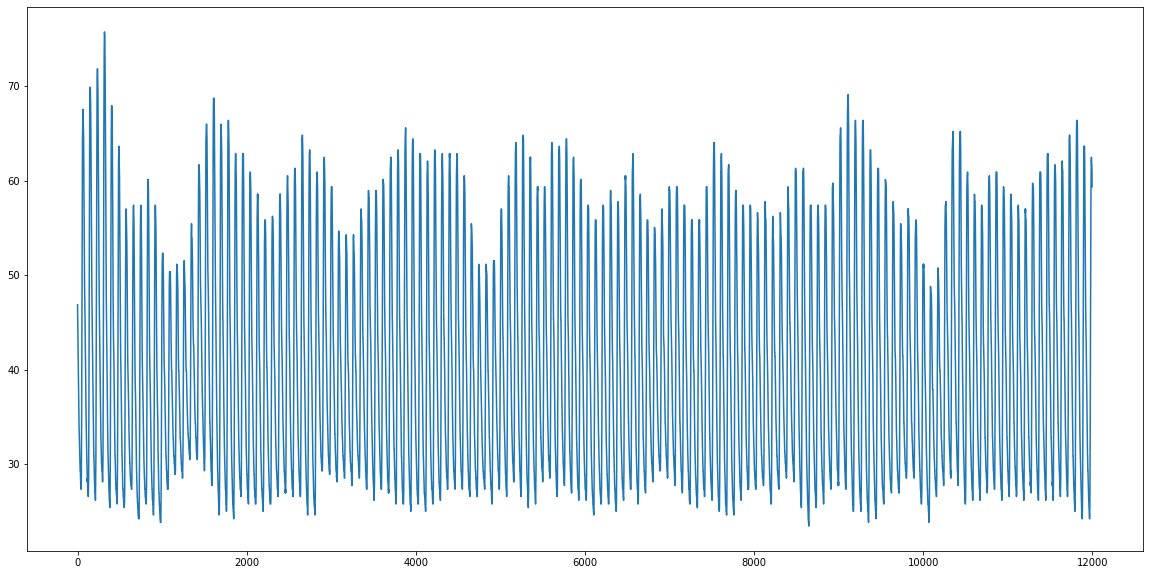

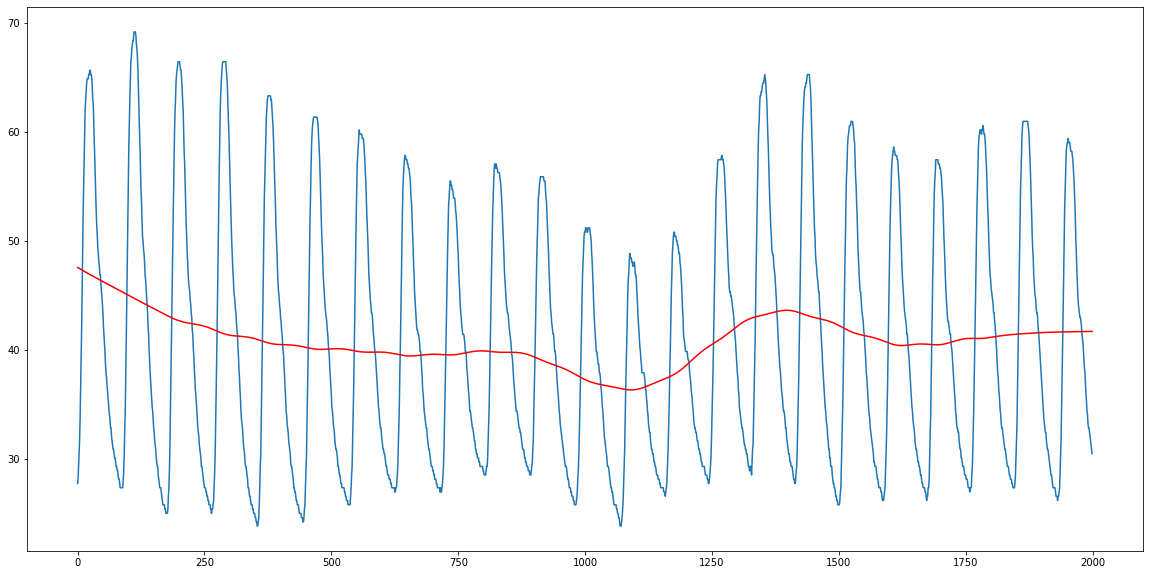

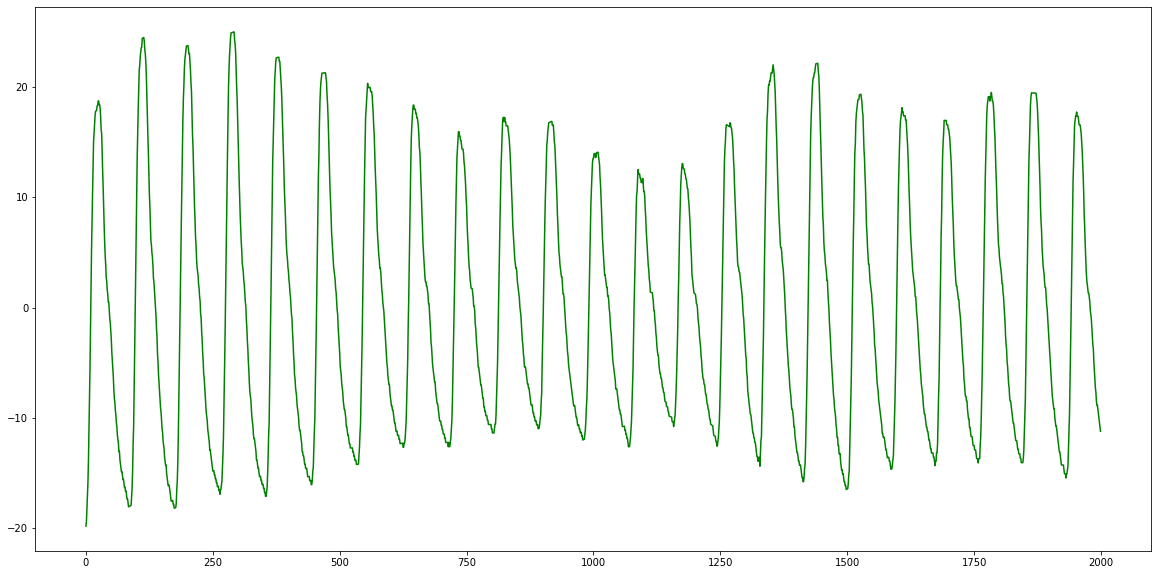

In [33]:
import matplotlib.pyplot as plt


start_idx = 9000
end_idx = start_idx + 2000
ppg_inp = np.copy(ppg_per_NRS[start_idx:end_idx])

plt.figure(figsize=(20,10))
plt.plot(ppg_per_NRS)

plt.figure(figsize=(20,10))
plt.plot(ppg_inp)
plt.plot(lowess(ppg_inp, f=0.2),'r')

plt.figure(figsize=(20,10))
plt.plot(ppg_inp - lowess(ppg_inp, f=0.2), 'g')
#plt.plot(ppg_inp - lowess(ppg_inp, f=0.2), 'r')

## Plotting Examples

In [59]:
input_path = '../DL_model/dataset/preprocess4/welch/'

# loading pacu
print('loading pacu data...', flush=True, end='')
x_train_pacu = np.load(input_path+'x_train_pacu.npz', allow_pickle=True)['arr_0']
y_train_pacu = np.load(input_path+'y_train_pacu.npz')['arr_0']
x_test_pacu = np.load(input_path+'x_test_pacu.npz', allow_pickle=True)['arr_0']
y_test_pacu = np.load(input_path+'y_test_pacu.npz')['arr_0']
x_val_pacu = np.load(input_path+'x_val_pacu.npz', allow_pickle=True)['arr_0']
y_val_pacu = np.load(input_path+'y_val_pacu.npz')['arr_0']
print('done', flush=True)


loading pacu data...done


In [60]:
x_train_pacu.shape

(63246, 2, 16, 128)

PPG idx: 1000  NRS: 8
PPG idx: 10  NRS: 3


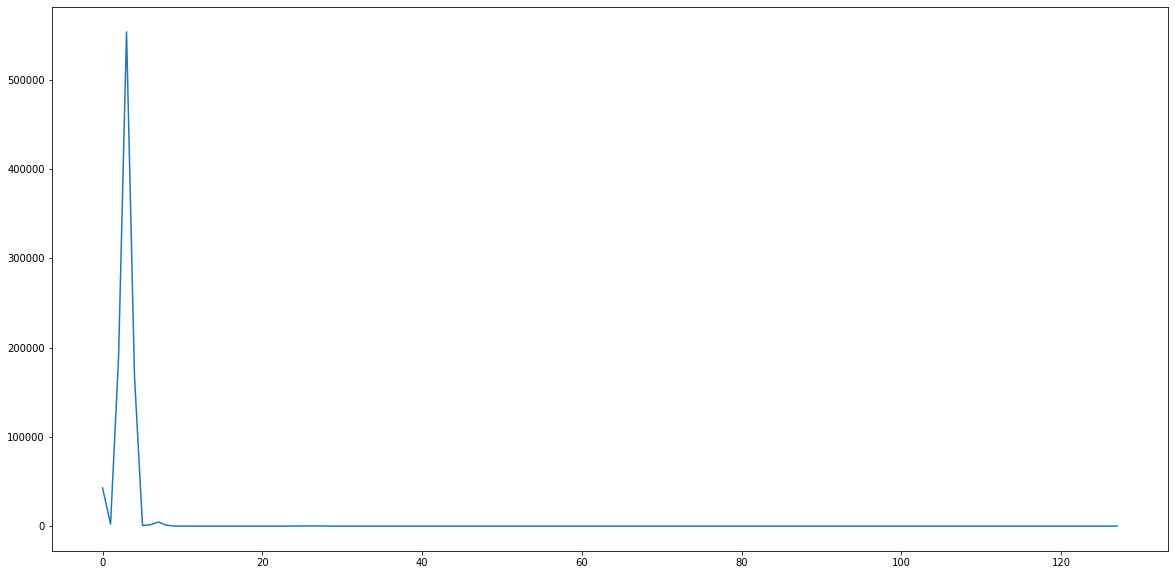

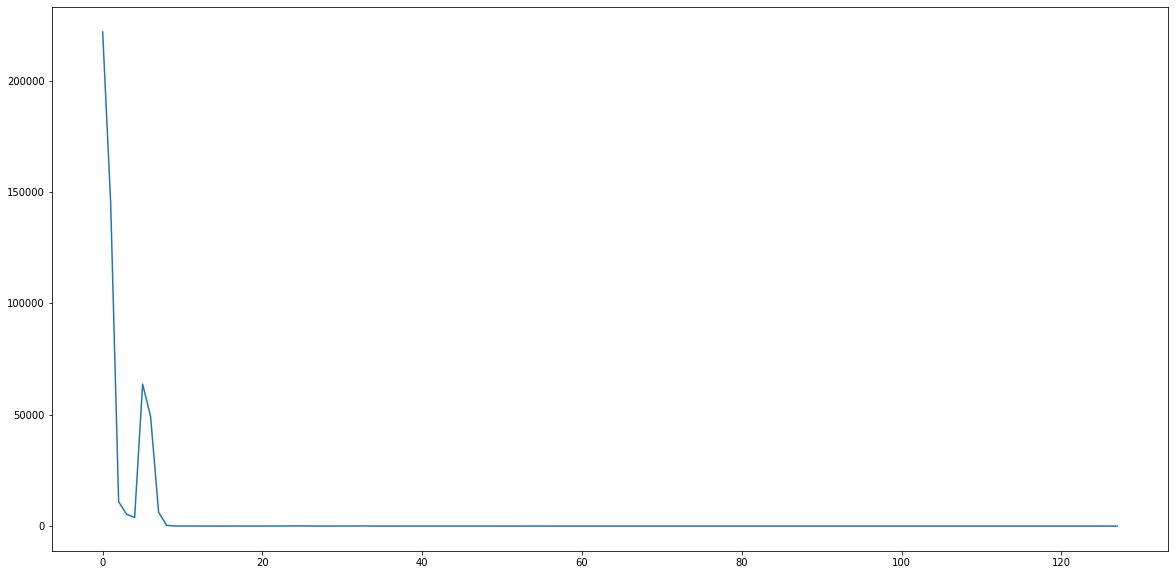

In [62]:
plt.figure(figsize=(20,10))

idx = 1000
print('PPG idx:', idx, end='')
plt.plot(x_train_pacu[idx,0,10])
print('  NRS:', y_train_pacu[idx])


plt.figure(figsize=(20,10))
idx = 10
print('PPG idx:', idx, end='')
plt.plot(x_train_pacu[idx,0,10])
print('  NRS:', y_train_pacu[idx])


## Pacu + preop

In [56]:
input_path = '../DL_model/dataset/preprocess4/PPG_100Hz/'

# loading pacu
print('loading pacu data...', flush=True, end='')

x_train_pacu1 = np.load(input_path+'x_train_pacu1.npz', allow_pickle=True)['arr_0']
y_train_pacu1 = np.load(input_path+'y_train_pacu1.npz')['arr_0']
x_test_pacu1 = np.load(input_path+'x_test_pacu1.npz', allow_pickle=True)['arr_0']
y_test_pacu1 = np.load(input_path+'y_test_pacu1.npz')['arr_0']
x_val_pacu1 = np.load(input_path+'x_val_pacu1.npz', allow_pickle=True)['arr_0']
y_val_pacu1 = np.load(input_path+'y_val_pacu1.npz')['arr_0']


x_train_pacu2 = np.load(input_path+'x_train_pacu2.npz', allow_pickle=True)['arr_0']
y_train_pacu2 = np.load(input_path+'y_train_pacu2.npz')['arr_0']
x_test_pacu2 = np.load(input_path+'x_test_pacu2.npz', allow_pickle=True)['arr_0']
y_test_pacu2 = np.load(input_path+'y_test_pacu2.npz')['arr_0']
x_val_pacu2 = np.load(input_path+'x_val_pacu2.npz', allow_pickle=True)['arr_0']
y_val_pacu2 = np.load(input_path+'y_val_pacu2.npz')['arr_0']


x_train_pacu = np.concatenate((x_train_pacu1, x_train_pacu2), axis = 0)
x_test_pacu = np.concatenate((x_test_pacu1, x_test_pacu2), axis = 0)
x_val_pacu = np.concatenate((x_val_pacu1, x_val_pacu2), axis = 0)
y_train_pacu = np.concatenate((y_train_pacu1, y_train_pacu2), axis = 0)
y_val_pacu = np.concatenate((y_val_pacu1, y_val_pacu2), axis = 0)
y_test_pacu = np.concatenate((y_test_pacu1, y_test_pacu2), axis = 0)


print('x_train_pacu shape:', x_train_pacu.shape)
print('x_val_pacu shape:', x_val_pacu.shape)
print('x_test_pacu shape:', x_test_pacu.shape)


# loading preop
print('loading preop data...', flush=True, end='')
x_train_preop = np.load(input_path+'x_train_preop.npz', allow_pickle=True)['arr_0']
y_train_preop = np.load(input_path+'y_train_preop.npz')['arr_0']
x_test_preop = np.load(input_path+'x_test_preop.npz', allow_pickle=True)['arr_0']
y_test_preop = np.load(input_path+'y_test_preop.npz')['arr_0']
x_val_preop = np.load(input_path+'x_val_preop.npz', allow_pickle=True)['arr_0']
y_val_preop = np.load(input_path+'y_val_preop.npz')['arr_0']
print('done', flush=True)

print('x_train_preop shape:', x_train_preop.shape)
print('x_val_preop shape:', x_val_preop.shape)
print('x_test_preop shape:', x_test_preop.shape)




# PACU와 preop 데이터 합치기
x_train = np.concatenate((x_train_pacu, x_train_preop), axis = 0)
y_train = np.concatenate((y_train_pacu, y_train_preop), axis = 0)
x_test = np.concatenate((x_test_pacu, x_test_preop), axis = 0)
y_test = np.concatenate((y_test_pacu, y_test_preop), axis = 0)
x_val = np.concatenate((x_val_pacu, x_val_preop), axis = 0)
y_val = np.concatenate((y_val_pacu, y_val_preop), axis = 0)




# 알맞게 input 변환
x_train = np.reshape(x_train, (-1,2000,1))
x_val = np.reshape(x_val, (-1,2000,1))
x_test = np.reshape(x_test, (-1,2000,1))

print('after concatenate + reshape')
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)


# filling nan
x_train[:,:,0] = pd.DataFrame(x_train[:,:,0]).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
x_test[:,:,0] = pd.DataFrame(x_test[:,:,0]).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
x_val[:,:,0] = pd.DataFrame(x_val[:,:,0]).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values


y_train_bin = y_train>=4
print('train {} ({} events {:.1f}%), test {}'.format(len(y_train_bin), sum(y_train_bin), 100*np.mean(y_train_bin), len(x_test)))


# 저장하기 - completed train, test set
print('saving...', end='', flush=True)
np.savez_compressed(input_path+'x_train.npz', x_train)
np.savez_compressed(input_path+'x_test.npz', x_test)
np.savez_compressed(input_path+'x_val.npz', x_val)
np.savez_compressed(input_path+'y_train.npz', y_train)
np.savez_compressed(input_path+'y_test.npz', y_test)
np.savez_compressed(input_path+'y_val.npz', y_val)
print('done', flush=True)

np.mean(y_train>=4), np.mean(y_val>=4), np.mean(y_test>=4)

loading pacu data...x_train_pacu shape: (63256, 2000)
x_val_pacu shape: (6724, 2000)
x_test_pacu shape: (7497, 2000)
loading preop data...done
x_train_preop shape: (11380, 2000)
x_val_preop shape: (1231, 2000)
x_test_preop shape: (1298, 2000)
after concatenate + reshape
x_train shape: (74636, 2000, 1)
x_val shape: (7955, 2000, 1)
x_test shape: (8795, 2000, 1)
train 74636 (48317 events 64.7%), test 8795
saving...done


(0.6473685620880004, 0.6286612193588937, 0.6185332575326891)